# Sphere Seeding Test Visualization

This notebook visualizes the blob distribution and first simulation frame for sphere seeding tests.

In [1]:
# Import libraries
import sys
sys.path.append('.')
from plotting_and_analysis_functions import *
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Define the sphere seeding test simulation
# Adjust the date and path according to your actual simulation
sphere_test_path = '../data/sphere_seeding_test/20251009/ciliate_360fil_10242blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift'

# Parameters (adjust these to match your simulation)
filament_length = 49.4
num_steps = 500
sphere_radius = 197.6
num_segs = 20

In [2]:
# Load the simulation data
print("Loading simulation data...")
sim = load_simulation(sphere_test_path, num_steps=num_steps, sphere_radius=sphere_radius, num_segs=num_segs)
print(f"✅ Loaded: {sim.phases.shape[0]} timesteps, {sim.phases.shape[1]} filaments")

Loading simulation data...
[info] Using num_steps=500 for time normalization.
✅ Loaded: 101 timesteps, 360 filaments
✅ Loaded: 101 timesteps, 360 filaments


## Blob Distribution Visualization

Visualize the surface blob positions in different views and color schemes.

Creating top-down blob visualization (colored by azimuth)...


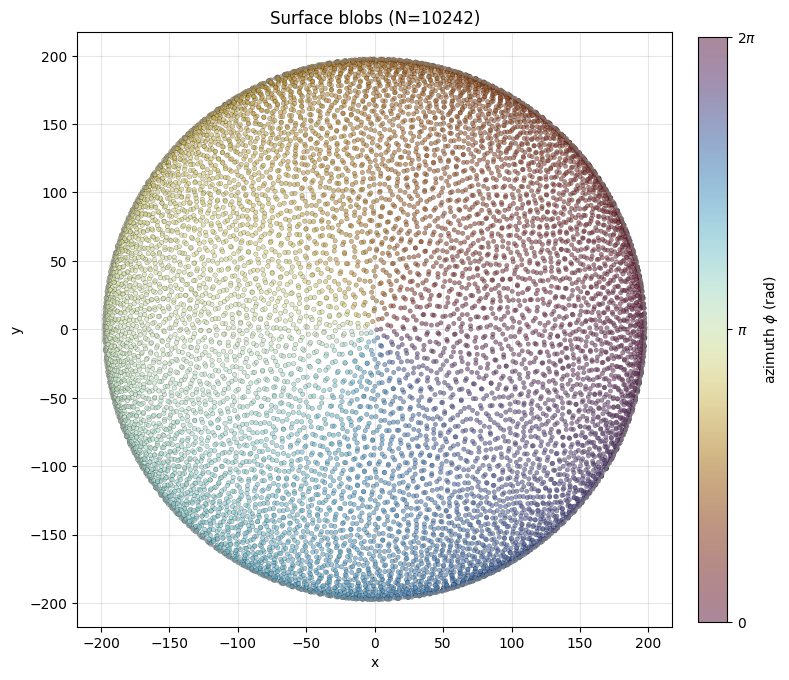

[info] Saved blob positions to analysis_output/ciliate_360fil_10242blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_blobs_top_azimuth.png


In [3]:
# Top-down view colored by azimuth
print("Creating top-down blob visualization (colored by azimuth)...")
fig1, ax1 = plot_blob_positions(
    sphere_test_path, 
    sim=sim, 
    view="top", 
    color_by="azimuth",
    show=True,
    save=True
)
plt.close(fig1)

Creating 3D blob visualization (colored by altitude)...


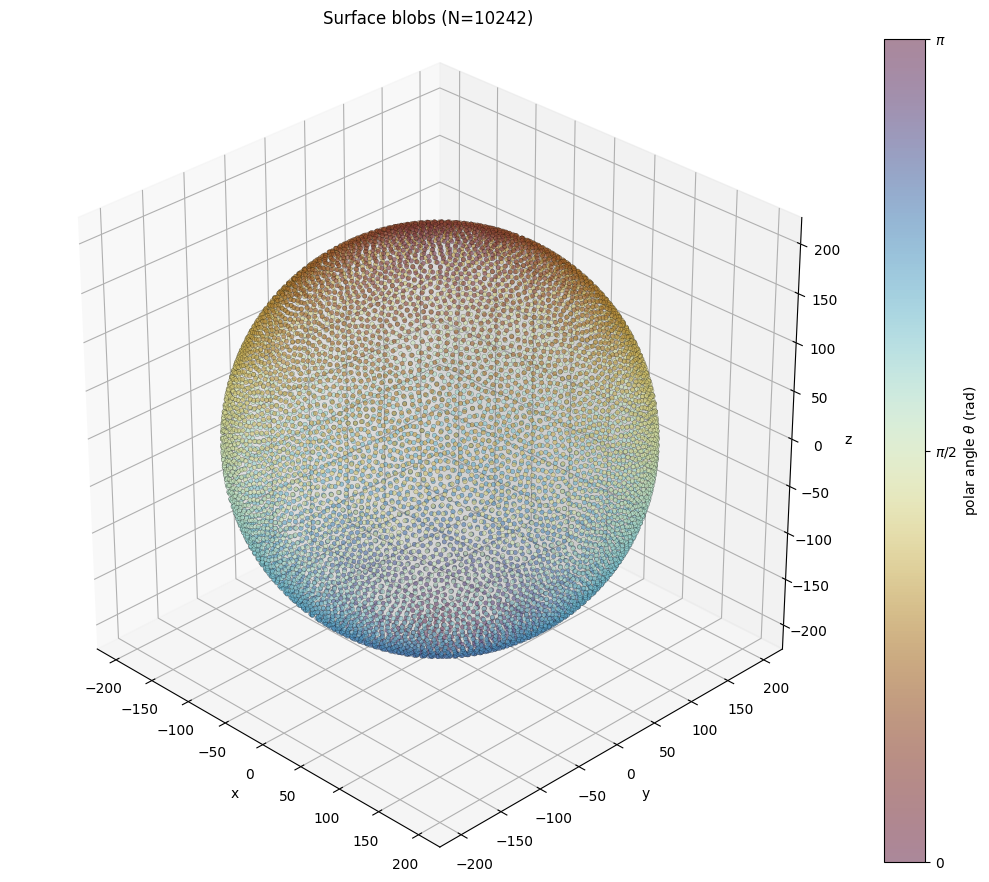

[info] Saved blob positions to analysis_output/ciliate_360fil_10242blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_blobs_iso_altitude.png


In [4]:
# 3D isometric view colored by altitude
print("Creating 3D blob visualization (colored by altitude)...")
fig2, ax2 = plot_blob_positions(
    sphere_test_path,
    sim=sim,
    view="iso",
    color_by="altitude",
    show=True,
    save=True
)
plt.close(fig2)

Creating 3D blob visualization (colored by index)...


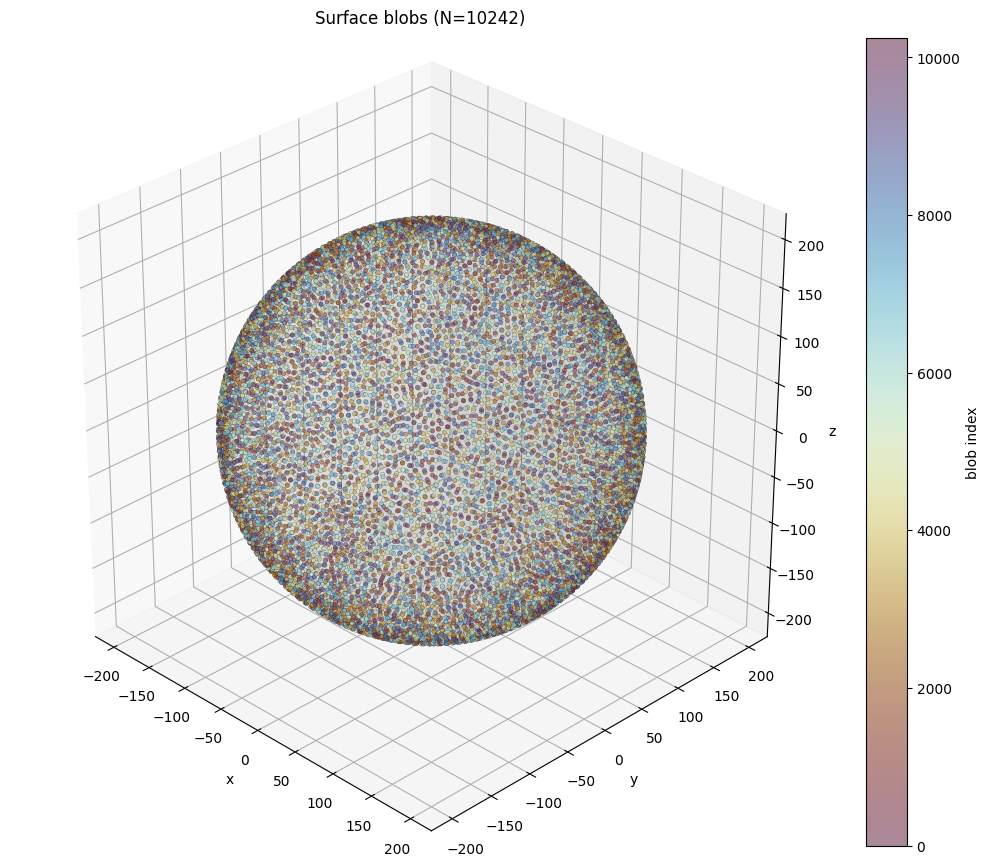

[info] Saved blob positions to analysis_output/ciliate_360fil_10242blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_blobs_sphere_index.png


In [5]:
# 3D sphere view colored by index (to see blob numbering)
print("Creating 3D blob visualization (colored by index)...")
fig3, ax3 = plot_blob_positions(
    sphere_test_path,
    sim=sim,
    view="sphere",
    color_by="index",
    show=True,
    save=True
)
plt.close(fig3)

## Filament Positions

Visualize the basal (attachment) positions of the cilia.

Creating basal position visualization...


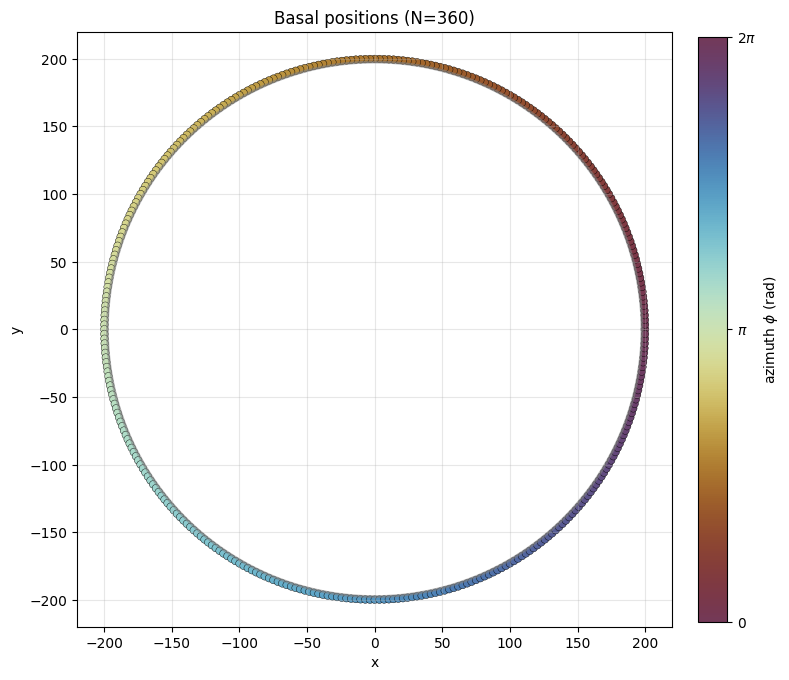

[info] Saved basal positions to analysis_output/ciliate_360fil_10242blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_basal_azimuth.png


In [6]:
# Plot basal positions
print("Creating basal position visualization...")
fig4, ax4 = plot_basal_positions(
    sphere_test_path,
    sim=sim,
    color_by="azimuth",
    show=True,
    save=True
)
plt.close(fig4)

## First Simulation Frame

Visualize the first frame of the simulation showing both cilia and the sphere.

Creating first frame visualization (top view)...


/data/pz723/cuda-filaments/analysis/plotting_and_analysis_functions.py:323: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


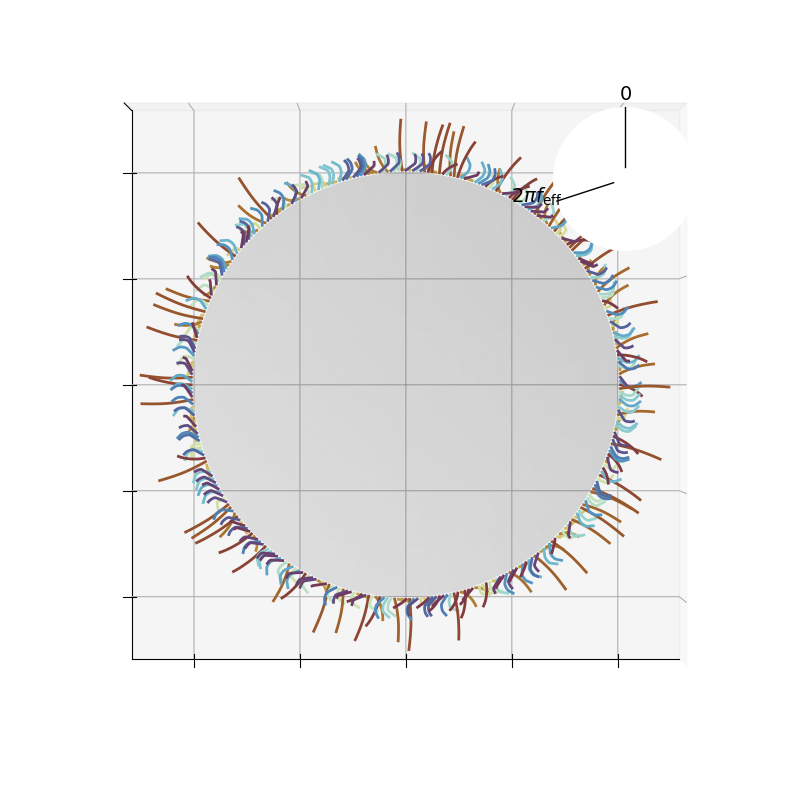

[info] Saved frame to analysis_output/ciliate_360fil_10242blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_frame_0_top.png


In [7]:
# Top-down view of first frame
print("Creating first frame visualization (top view)...")
fig5, ax5 = plot_frame(
    sphere_test_path,
    sim=sim,
    frame=0,  # First frame
    view="top",
    color_by_phase=True,
    show=True,
    save=True
)
plt.close(fig5)

Creating first frame visualization (isometric view)...


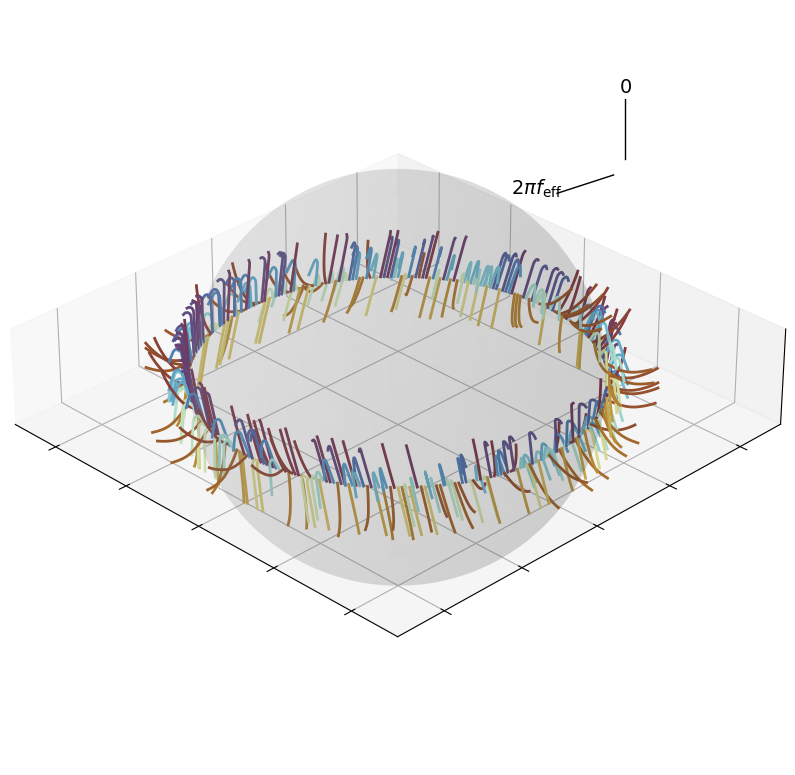

[info] Saved frame to analysis_output/ciliate_360fil_10242blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_frame_0_iso.png


In [8]:
# Isometric view of first frame
print("Creating first frame visualization (isometric view)...")
fig6, ax6 = plot_frame(
    sphere_test_path,
    sim=sim,
    frame=0,  # First frame
    view="iso",
    color_by_phase=True,
    show=True,
    save=True
)
plt.close(fig6)

## Combined Visualization

Create a figure showing both blobs and cilia together.

/tmp/ipykernel_3122024/979346768.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


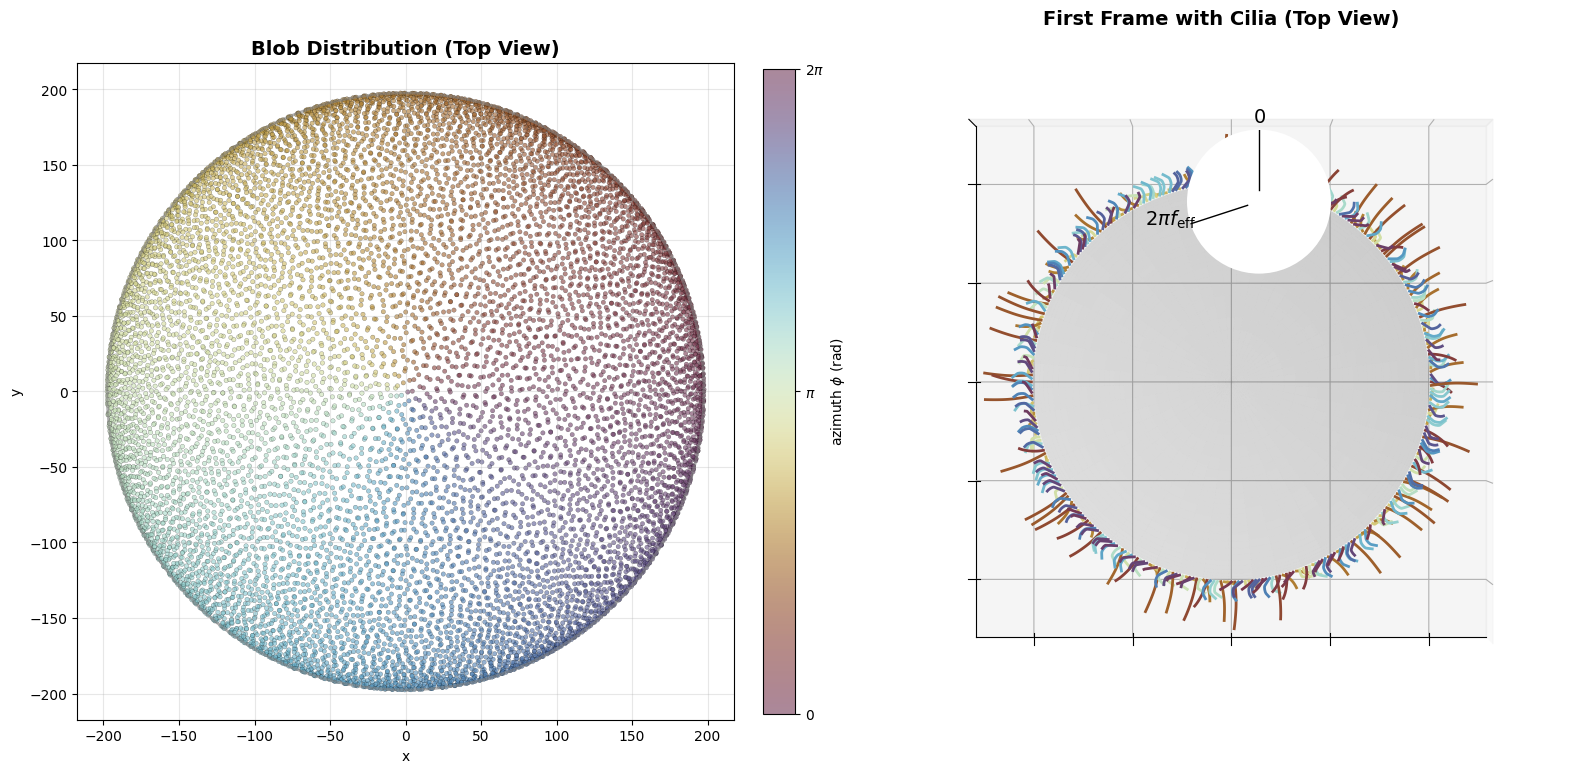

✅ Combined visualization saved!


In [9]:
# Create a combined figure with blobs and first frame
fig = plt.figure(figsize=(16, 8))

# Left panel: blob distribution (top view)
ax_left = fig.add_subplot(121)
plot_blob_positions(
    sphere_test_path,
    sim=sim,
    view="top",
    color_by="azimuth",
    show=False,
    save=False,
    fig_ax=(fig, ax_left)
)
ax_left.set_title("Blob Distribution (Top View)", fontsize=14, fontweight='bold')

# Right panel: first frame with cilia
ax_right = fig.add_subplot(122, projection='3d')
plot_frame(
    sphere_test_path,
    sim=sim,
    frame=0,
    view="top",
    color_by_phase=True,
    show=False,
    save=False,
    fig_ax=(fig, ax_right)
)
ax_right.set_title("First Frame with Cilia (Top View)", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('analysis_output/sphere_seeding_test_combined.png', dpi=180, bbox_inches='tight')
plt.show()
print("✅ Combined visualization saved!")

## Statistics

Print some statistics about the seeding.

In [10]:
# Load blob positions
blob_ref_file = f"{sphere_test_path}_blob_references.dat"
if Path(blob_ref_file).exists():
    blob_pos = np.loadtxt(blob_ref_file).reshape(-1, 3)
    
    # Calculate statistics
    blob_radii = np.linalg.norm(blob_pos, axis=1)
    mean_blob_radius = np.mean(blob_radii)
    std_blob_radius = np.std(blob_radii)
    
    print(f"\n{'='*50}")
    print(f"BLOB SEEDING STATISTICS")
    print(f"{'='*50}")
    print(f"Number of blobs: {len(blob_pos)}")
    print(f"Mean blob radius: {mean_blob_radius:.4f}")
    print(f"Std blob radius: {std_blob_radius:.4f}")
    print(f"Expected sphere radius: {sim.sphere_radius:.4f}")
    print(f"Relative error: {100*abs(mean_blob_radius - sim.sphere_radius)/sim.sphere_radius:.2f}%")
    
    # Angular distribution
    phi_blob = np.mod(np.arctan2(blob_pos[:,1], blob_pos[:,0]), 2*np.pi)
    theta_blob = np.arccos(np.clip(blob_pos[:,2] / (blob_radii + 1e-14), -1, 1))
    
    print(f"\nAzimuthal coverage: [{np.min(phi_blob):.4f}, {np.max(phi_blob):.4f}] rad")
    print(f"Polar angle coverage: [{np.min(theta_blob):.4f}, {np.max(theta_blob):.4f}] rad")
    print(f"  (0 = north pole, π = south pole)")
    
    # Nearest neighbor distances
    from scipy.spatial.distance import pdist
    blob_distances = pdist(blob_pos)
    min_dist = np.min(blob_distances)
    mean_dist = np.mean(blob_distances)
    
    print(f"\nMinimum blob separation: {min_dist:.4f}")
    print(f"Mean blob separation: {mean_dist:.4f}")
    print(f"{'='*50}\n")
else:
    print(f"⚠️  Blob reference file not found: {blob_ref_file}")

# Filament statistics
print(f"\n{'='*50}")
print(f"FILAMENT SEEDING STATISTICS")
print(f"{'='*50}")
print(f"Number of filaments: {sim.num_fils}")
print(f"Number of segments per filament: {sim.num_segs}")

# Basal position statistics
basal_radii = np.linalg.norm(sim.basal_pos, axis=1)
mean_basal_radius = np.mean(basal_radii)
std_basal_radius = np.std(basal_radii)

print(f"\nMean basal radius: {mean_basal_radius:.4f}")
print(f"Std basal radius: {std_basal_radius:.4f}")
print(f"Expected sphere radius: {sim.sphere_radius:.4f}")

# Angular distribution
theta_fil = np.arccos(np.clip(sim.basal_pos[:,2] / (basal_radii + 1e-14), -1, 1))
print(f"\nFilament polar angle coverage: [{np.min(theta_fil):.4f}, {np.max(theta_fil):.4f}] rad")
print(f"  (0 = north pole, π = south pole)")

# Check for gaps in azimuthal distribution
phi_sorted = np.sort(sim.basal_phi)
phi_gaps = np.diff(phi_sorted)
max_gap = np.max(phi_gaps)
print(f"\nMaximum azimuthal gap between adjacent filaments: {max_gap:.4f} rad ({np.degrees(max_gap):.2f}°)")
print(f"{'='*50}\n")


BLOB SEEDING STATISTICS
Number of blobs: 10242
Mean blob radius: 197.6000
Std blob radius: 0.0003
Expected sphere radius: 197.6000
Relative error: 0.00%

Azimuthal coverage: [0.0002, 6.2831] rad
Polar angle coverage: [0.0078, 3.1230] rad
  (0 = north pole, π = south pole)



Minimum blob separation: 4.5059
Mean blob separation: 263.4707


FILAMENT SEEDING STATISTICS
Number of filaments: 360
Number of segments per filament: 20

Mean basal radius: 199.9000
Std basal radius: 0.0003
Expected sphere radius: 197.6000

Filament polar angle coverage: [1.5708, 1.5708] rad
  (0 = north pole, π = south pole)

Maximum azimuthal gap between adjacent filaments: 0.0175 rad (1.00°)

